In [1]:
# Data Manupulating Libaraies 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import re
# Machine Learning Libraries 

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score


In [2]:
df = pd.read_csv('data/laptop_data.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()   

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [4]:
df.duplicated().sum()

29

In [5]:
df.duplicated().sum()

29

=> 29 Duplicated Rows

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [7]:
df.describe()

,Inches,Price
count,1303.000000,1303.000000
mean,15.017191,59870.042910
std,1.426304,37243.201786
min,10.100000,9270.720000
25%,14.000000,31914.720000
50%,15.600000,52054.560000
75%,15.600000,79274.246400
max,18.400000,324954.720000


<Axes: xlabel='TypeName'>

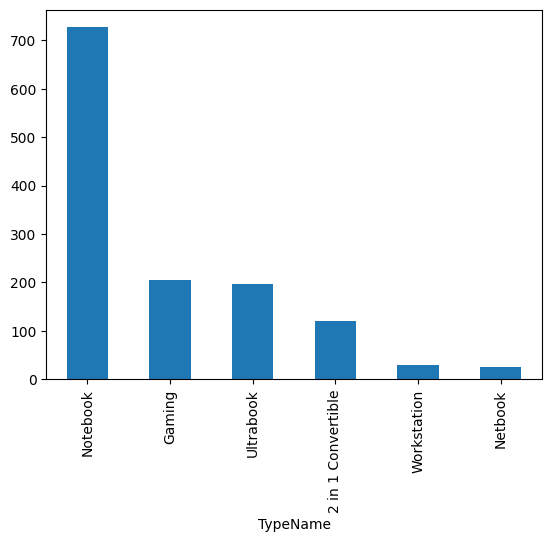

In [8]:
df['TypeName'].value_counts().plot(kind='bar')

<Axes: xlabel='Company'>

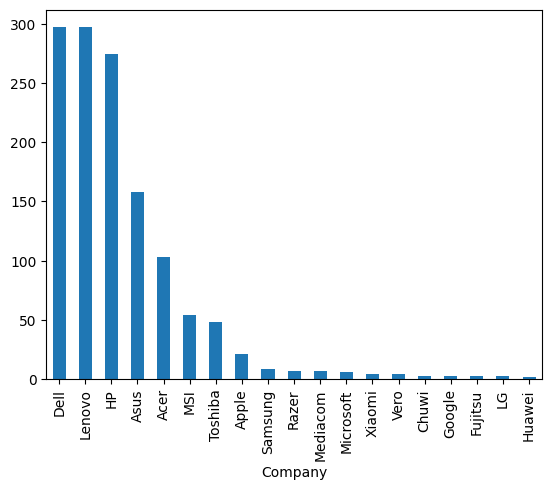

In [9]:
df['Company'].value_counts().plot(kind='bar')

In [10]:
df['Cpu'].value_counts().sample(5)

Cpu
Intel Pentium Quad Core N3700 1.6GHz      2
Intel Celeron Dual Core N3060 1.60GHz     1
Intel Core i5 7200U 2.7GHz                1
Intel Core i5 6440HQ 2.6GHz               1
Intel Pentium Quad Core N3710 1.6GHz     11
Name: count, dtype: int64

=> Making 3 Categpries, Intel, Amd & others

In [11]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

=> Cleaning: 3 Columns IPS, Touch Screen, x Resolution & Y resolution

<Axes: xlabel='Ram'>

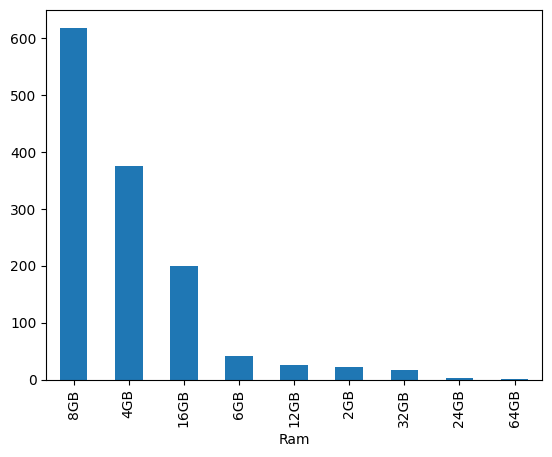

In [12]:
df['Ram'].value_counts().plot(kind='bar')

In [13]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

=> Seperate them to 3 Columns 1. GB Size, 2. SSD, 3. HDD

In [14]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

=> INtel, AMD, Nvidia, others

<Axes: xlabel='OpSys'>

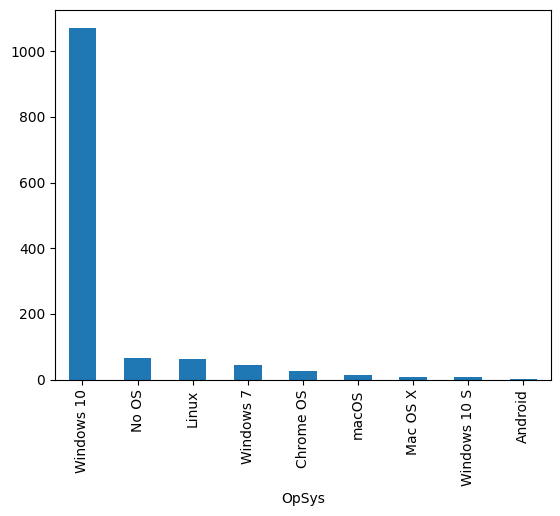

In [15]:
df['OpSys'].value_counts().plot(kind='bar')

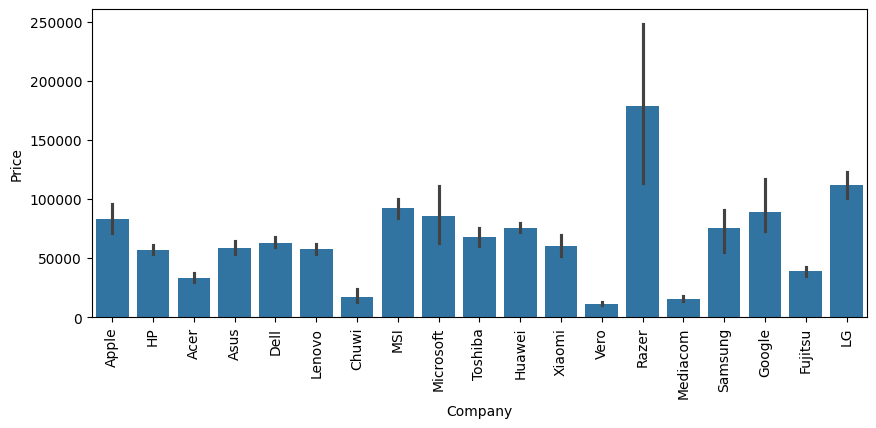

In [16]:
plt.figure(figsize=(10,4))
sns.barplot(df, x='Company', y='Price')
plt.xticks(rotation=90)
plt.show()

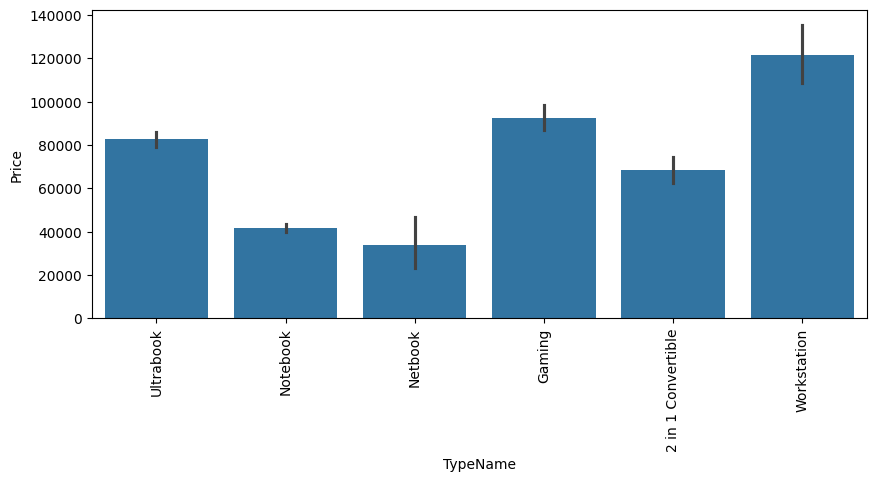

In [17]:
plt.figure(figsize=(10,4))
sns.barplot(df, x='TypeName', y='Price')
plt.xticks(rotation=90)
plt.show()

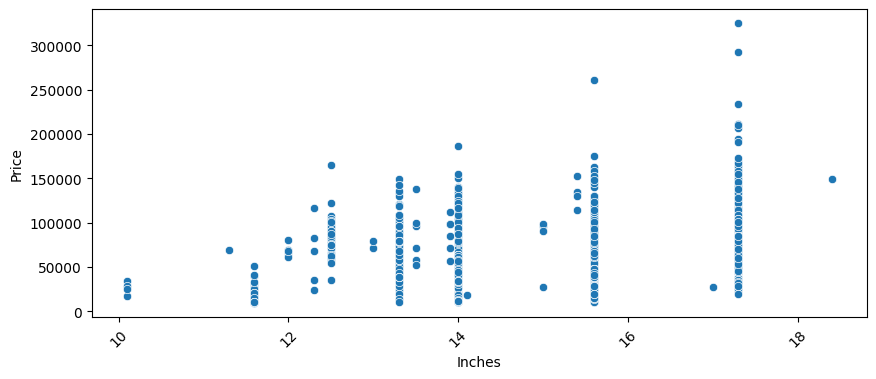

In [18]:
plt.figure(figsize=(10,4))
sns.scatterplot(df, x='Inches', y='Price')
plt.xticks(rotation=45)
plt.show()

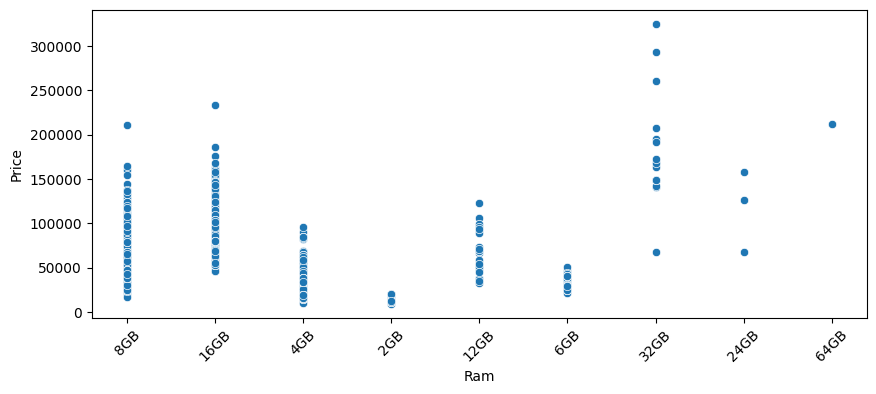

In [19]:
plt.figure(figsize=(10,4))
sns.scatterplot(df, x='Ram', y='Price')
plt.xticks(rotation=45)
plt.show()

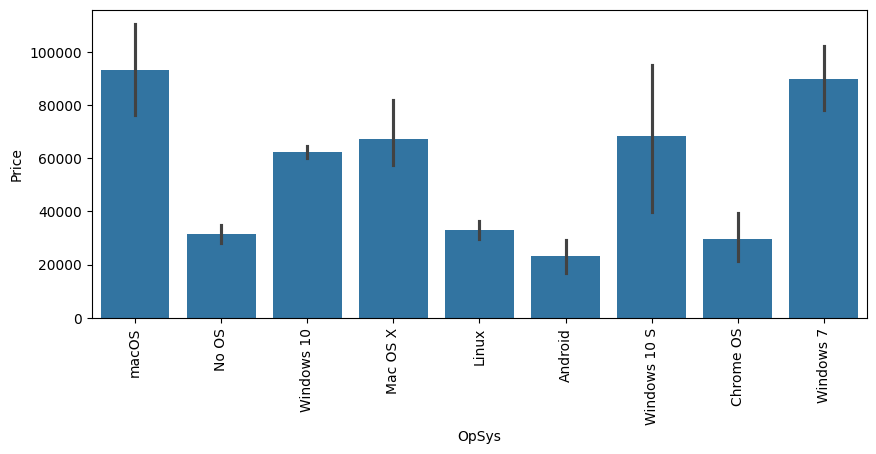

In [20]:
plt.figure(figsize=(10,4))
sns.barplot(df, x='OpSys', y='Price')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='count', ylabel='Density'>

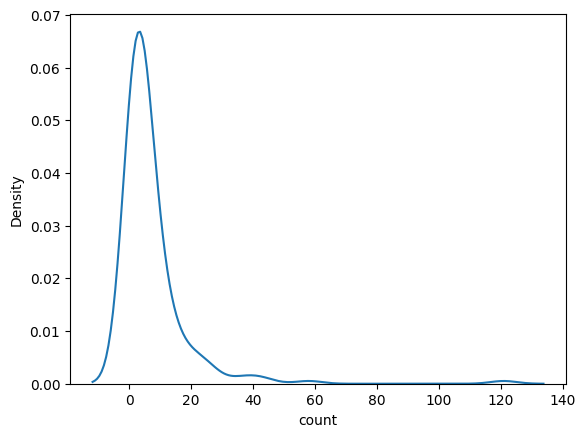

In [21]:
sns.kdeplot(df['Weight'].value_counts())

Text(0.5, 0, 'Inches')

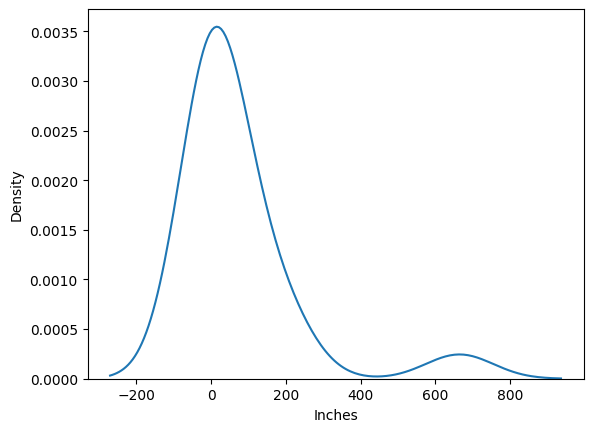

In [22]:
sns.kdeplot(df['Inches'].value_counts())
plt.xlabel('Inches')

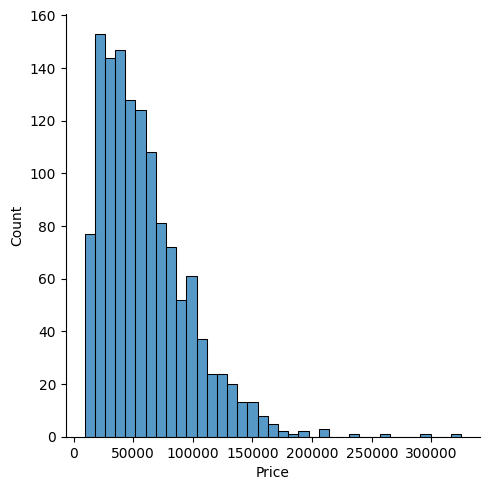

In [23]:
sns.displot(df['Price'])

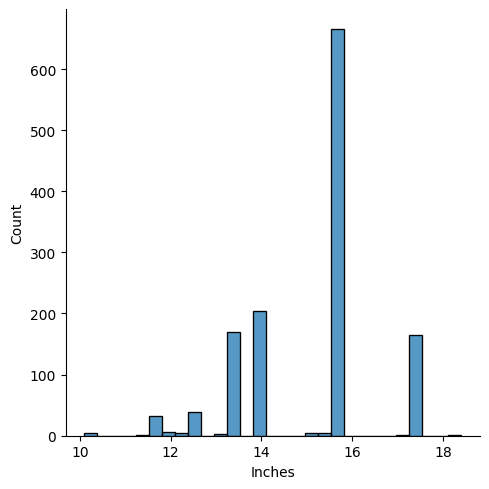

In [24]:
sns.displot(df['Inches'])

# Data Cleaning & Trandformations

1. Removing GB from Ram & Kg from Weight
2. Cleaning Screen Resolution Column
3. Cleaning the Cpu Column
4. Cleaning Memory Column
5. Cleaning Gpu Column
6. Cleaning the Os Column
7. Cleaning the Weight Column

In [25]:
# Remoivng GB from Ram Column

df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)

In [26]:
# Removing KG from the Weight Column 

df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)

In [27]:
# Cleaning the Screen Resolution Column

ips = []
touch = []
x_resolution = []
y_resolution = []

for s in df['ScreenResolution']:
    match = re.search(r'^(.*?)(\d+x\d+)$', s)
    value2 = match.group(1)
    value3  = match.group(2)
    
    if "IPS" in value2:
        ips.append(1)
    else:
        ips.append(0)

    if 'Touchscreen' in value2:
        touch.append(1)
    else:
        touch.append(0)

    x_resolution.append(int(value3.split('x')[0]))
    y_resolution.append(int(value3.split('x')[1]))

df['ips'] = ips
df['touch'] = touch
df['x_resolution'] = x_resolution
df['y_resolution'] = y_resolution


In [28]:
df.drop('ScreenResolution', axis=1, inplace=True)

In [29]:
# Calculating DPI for Screen 

df['screen_dpi'] = ((df['x_resolution'])**2 + (df['y_resolution'])**2)**0.5 / df['Inches']

Text(0.5, 0, 'Screen DPI')

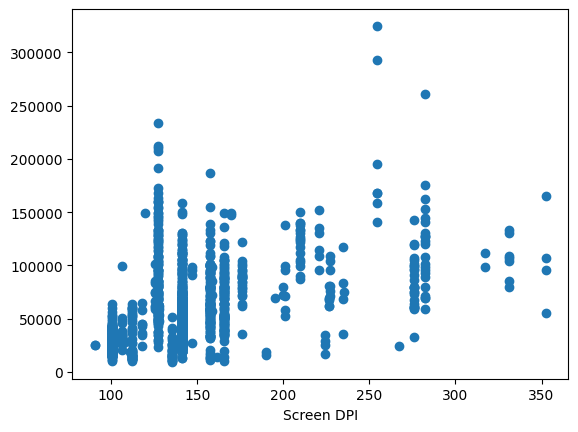

In [30]:
plt.scatter(df['screen_dpi'], y=df['Price'])
plt.xlabel('Screen DPI')

In [31]:
df.drop('x_resolution', axis=1, inplace=True)
df.drop('y_resolution', axis=1, inplace=True)
df.drop('Inches', axis=1, inplace=True)

In [32]:
# cleaning CPu Column 

cpu = []

for s in df['Cpu']:
    if 'i5' in s:
        cpu.append(" ".join(s.split(' ')[:3]))
    elif 'i7' in s:
        cpu.append(" ".join(s.split(' ')[:3]))
    elif 'i3' in s:
        cpu.append(" ".join(s.split(' ')[:3]))
    elif 'AMD' in s:
        cpu.append('AMD Processor')
    else:
        cpu.append('other')

df['Cpu'] = cpu

In [33]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ips,touch,screen_dpi
0,Apple,Ultrabook,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,226.983005
1,Apple,Ultrabook,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,220.534624
4,Apple,Ultrabook,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,226.983005


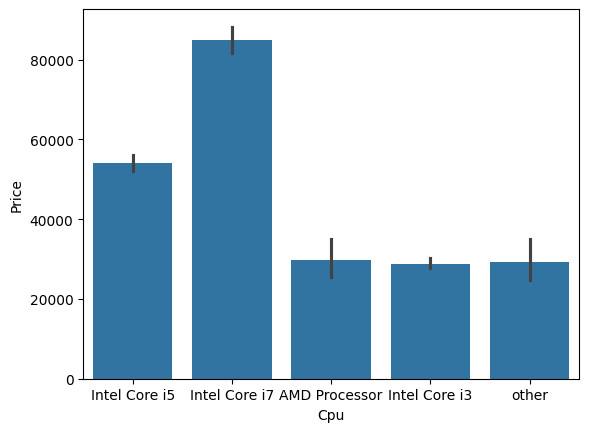

In [34]:
sns.barplot(x=df['Cpu'], y=df['Price'])
plt.show()

In [35]:
# Cleaning Memory Column 

def parse_storage(storage_str):
    # Parse SSD, HDD, Flash, Hybrid
    ssd = re.findall(r'(\d+\.?\d*\s*(?:GB|TB)\s*SSD)', storage_str, re.IGNORECASE)
    hdd = re.findall(r'(\d+\.?\d*\s*(?:GB|TB)\s*HDD)', storage_str, re.IGNORECASE)
    flash = re.findall(r'(\d+\.?\d*\s*(?:GB|TB)\s*Flash Storage)', storage_str, re.IGNORECASE)
    hybrid = re.findall(r'(\d+\.?\d*\s*(?:GB|TB)\s*Hybrid)', storage_str, re.IGNORECASE)
    
    # Convert to number (assume GB for simplicity)
    def extract_size(s):
        num = float(re.match(r"(\d+\.?\d*)", s).group(1))
        if "TB" in s:
            num *= 1024  # Convert TB to GB
        return num
    
    return {
        "ssd": extract_size(ssd[0]) if ssd else 0,
        "hdd": extract_size(hdd[0]) if hdd else 0,
        "flash": extract_size(flash[0]) if flash else 0,
        "hybrid": extract_size(hybrid[0]) if hybrid else 0,
    }

# Parse all data
parsed_data = [parse_storage(item) for item in df['Memory']]

# Convert to DataFrame
df2 = pd.DataFrame(parsed_data)

# Show the DataFrame
df = pd.concat([df, df2], axis=1)


In [36]:
df.drop(columns=['Memory'], inplace=True)

In [37]:
# Correlations 

df[['ssd', 'hdd', 'hybrid', 'flash', 'Price']].corr()['Price']

ssd       0.675986
hdd      -0.094082
hybrid    0.008011
flash    -0.040511
Price     1.000000
Name: Price, dtype: float64

In [38]:
# cleaning the GPU Column 

df['Gpu'] = df['Gpu'].apply(lambda x: x.split(' ')[0])

In [39]:
df = df[df['Gpu'] != 'ARM']

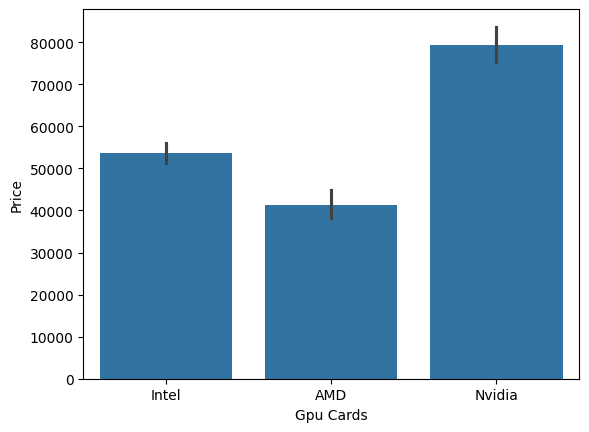

In [40]:
sns.barplot(x=df['Gpu'], y=df['Price'])
plt.xlabel('Gpu Cards')
plt.show()

In [41]:
# Cleaning the Operating System Column 

for s in df['OpSys']:
    if 'Windows' in s:
        df['OpSys'] = df['OpSys'].replace(s, 'Windows')
    elif 'Mac' in s:
        df['OpSys'] = df['OpSys'].replace(s, 'Mac')
    else:
        df['OpSys'] = df['OpSys'].replace(s, 'Others')


<Axes: xlabel='OpSys', ylabel='Price'>

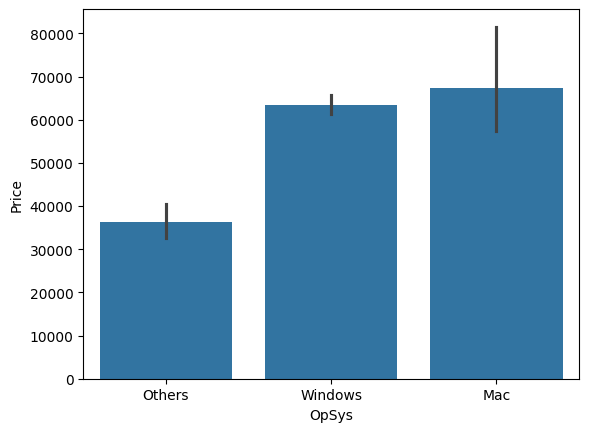

In [42]:
sns.barplot(x=df['OpSys'], y=df['Price'])

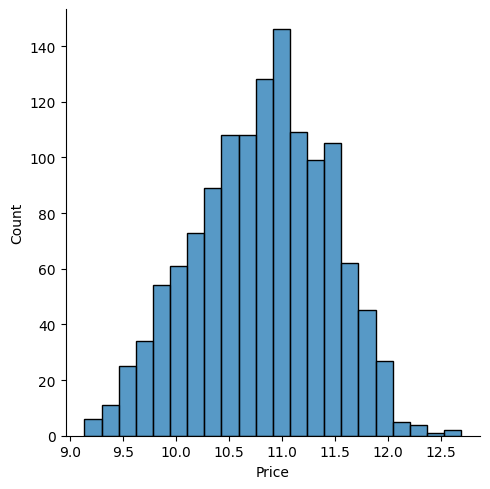

In [43]:
# Transforming Price Column 

sns.displot(np.log(df['Price']))

# Spliting Data

In [44]:
x = df.drop(['Price'], axis=1)
y = np.log(df['Price'])

In [45]:
# traing and testing data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [46]:
x_train = x_train.drop(columns=['hybrid', 'flash'])
x_test = x_test.drop(columns=['hybrid', 'flash'])

In [47]:
# One Hot With Column Transformer 

treansformer = ColumnTransformer([
    ('tnf1', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), [0, 1, 2, 4, 5])
], remainder='passthrough')

# Model Traning & Testing

#### 1. Linaer Regression Model

In [48]:
model = LinearRegression()

pipline =  Pipeline([
    ('transformer', treansformer),
    ('model', model)])

pipline.fit(x_train, y_train)
predict_1 = pipline.predict(x_test)

# Model Evaluation

print(f'R2 Score: {r2_score(y_test, predict_1)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, predict_1)}')

R2 Score: 0.8074083692170899
Mean Absolute Error: 0.2145168339878697


#### 2. Decision Tree Regressor

In [49]:
model2 = DecisionTreeRegressor(random_state=4)

pipline2 =  Pipeline([
    ('treansformer', treansformer),
    ('model2', model2)])

# Parameter Tuning

param_grid = {
    'model2__criterion': ['squared_error', 'friedman_mse'],
    'model2__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
}

cv = GridSearchCV(pipline2, param_grid, cv=5)
cv.fit(x_train, y_train)
predict_2 = cv.predict(x_test)


# Model Evaluation

print(f'R2 Score: {r2_score(y_test, predict_2)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, predict_2)}')

R2 Score: 0.8259143060217129
Mean Absolute Error: 0.20419638609073745


#### 3. Random Forest Regressor

In [50]:
model3 = RandomForestRegressor(random_state=2)

pipline3 = Pipeline([
    ('transformer', treansformer),
    ('model3', model3)
])

# Parametr Tuning 
param_grid={
    'model3__n_estimators': [100, 150],
    'model3__max_depth':[10, 15, 18, 20],
    'model3__max_features': [0.5, 0.75, 1.0]
}

cv = GridSearchCV(pipline3, param_grid, cv=5)
cv.fit(x_train, y_train)
predict_3 = cv.predict(x_test)

cv.best_params_

# Model Evaluation

print(f'R2 Score: {r2_score(y_test, predict_3)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, predict_3)}')

R2 Score: 0.8751282725907692
Mean Absolute Error: 0.16649546016626768


In [51]:
# import pickle

# # Saving Model

# pickle.dump(df, open('df.pkl', 'wb'))
# pickle.dump(cv, open('model.pkl', 'wb'))

In [52]:
x_train.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,ips,touch,screen_dpi,ssd,hdd
147,Asus,Notebook,other,4,Intel,Windows,2.00,0,0,141.211998,0.0,1024.0
342,HP,Notebook,Intel Core i3,8,Nvidia,Windows,2.10,1,0,141.211998,0.0,1024.0
1003,HP,Notebook,Intel Core i5,4,Intel,Windows,1.64,0,0,111.935204,0.0,500.0
814,Dell,Notebook,Intel Core i5,8,AMD,Windows,2.18,0,0,141.211998,256.0,0.0
344,Dell,Ultrabook,Intel Core i7,8,Intel,Windows,1.20,0,0,165.632118,256.0,0.0
